## Imports and loading raw csvs

In [1]:
# Import necessary libraries
from dataframe_utils import * # this imports all the functions from our dataframe_utils including all the imports
from plotting_utils import * # this imports all the functions from our plotting_utils
import plotting_utils
%load_ext autoreload
%autoreload 2

In [2]:
# this is a windows command
os.getcwd()

'p:\\Anaysis\\Inshell\\code'

INPUT: the two run names containing the switched clutches 

In [47]:
run_name_cam2="202208_cam2"
run_name_cam3="202208_cam3"
model='model6'

In [48]:
df_cam2_raw = pd.read_csv(f'../{run_name_cam2}/data/{run_name_cam2}_{model}.csv')
df_cam3_raw = pd.read_csv(f'../{run_name_cam3}/data/{run_name_cam3}_{model}.csv')

## Filter larvae and confidence

Cam2 csv filters:

In [49]:
larvae_wrig = df_cam2_raw[df_cam2_raw['class']=='wrigglers']
larvae_egg = df_cam2_raw[df_cam2_raw['class']=='egg']
df_cam2_raw = larvae_wrig.append(larvae_egg)
df_cam2_raw = df_cam2_raw[df_cam2_raw["confidence"]>= 0.5]

Cam3 csv filters:

In [50]:
larvae_wrig = df_cam3_raw[df_cam3_raw['class']=='wrigglers']
larvae_egg = df_cam3_raw[df_cam3_raw['class']=='egg']
df_cam3_raw = larvae_wrig.append(larvae_egg)
df_cam3_raw = df_cam3_raw[df_cam3_raw["confidence"]>= 0.5]

##  Extract time of day column

Here we use a dataframe_utils function: *add_time_col*. 

*add_time_col* uses *extract_date_time* function to get the time the image was taken from it's file name. To work with this format we need the datetime package

In [51]:
df_cam2_raw = add_time_col(df_cam2_raw)
df_cam3_raw = add_time_col(df_cam3_raw)

## Splitting the df

The clutch swap is usually over several frames and is a bit messy.The important frames is the last good frame before clutch swap was started and the first good frame after the swapping.
Run this per df_cam that you need to split and change all 2s and 3s to correct cam

In [52]:
# cam2 split -> the first good frame after the clutch swap mess
time_of_split_str="20220901_144804"
df_cam2_before_raw, df_cam2_after_raw = split_df_at_time(df_cam2_raw, time_of_split_str)

In [53]:
# Make sure the sum of the lengths of the 2 splits equals the original dataframe length
print(len(df_cam2_raw) == (len(df_cam2_before_raw)+len(df_cam2_after_raw)))

True


In [54]:
# cam3 split -> the first good frame after the clutch swap mess
time_of_split_str="20220901_143402"
df_cam3_before_raw, df_cam3_after_raw = split_df_at_time(df_cam3_raw, time_of_split_str)

In [55]:
# Make sure the sum of the lengths of the 2 splits equals the original dataframe length
print(len(df_cam3_raw) == (len(df_cam3_before_raw)+len(df_cam3_after_raw)))

True


#### filter out the messy swap images

In [56]:
# cam2 -> the last good frame before the clutch swap mess
time_of_split_str="20220901_102619"
df_cam2_before_raw, _ = split_df_at_time(df_cam2_raw, time_of_split_str)

#cam3 -> the last good frame before the clutch swap mess
time_of_split_str="20220901_135424"
df_cam3_before_raw, _ = split_df_at_time(df_cam3_before_raw, time_of_split_str)

## Extract and adjust DPF column

Make changes: 

In [57]:
# create dpf column, note all will start at zero
df_cam2_before = add_dpf_col_human_time(df_cam2_before_raw)
df_cam2_after = add_dpf_col_human_time(df_cam2_after_raw)

df_cam3_before = add_dpf_col_human_time(df_cam3_before_raw)
df_cam3_after = add_dpf_col_human_time(df_cam3_after_raw)

# Manually correct the cam_after dpfs to start with correct age
df_cam3_after["dpf"] = df_cam3_after["dpf"] + 4
df_cam2_after["dpf"] = df_cam2_after["dpf"] + 6

#OR

#Automatic correction
# df_cam2_after["dpf"] = df_cam2_after["dpf"] + df_cam3_before["dpf"].max()
# df_cam3_after["dpf"] = df_cam3_after["dpf"] + df_cam2_before["dpf"].max()

p:\Anaysis\Inshell\code\dataframe_utils.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["dpf"] = dataframe["time_of_day"].apply(lambda x: extract_dpf(x, start_dpf)) # lambda is an anonymous function. We need it to be able to pass 2 parameters
c:\Users\ashparker\AppData\Local\miniconda3\envs\inShell\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
c:\Users\ashparker\AppData\Local\miniconda3\envs\inShell\lib\site-packages\ipyker

In [58]:
df_cam2_before["dpf"].min()

NaT

In [59]:
df_cam2_after["dpf"].min()

6

In [60]:
df_cam3_before["dpf"] .min()

0

In [61]:
df_cam3_after["dpf"] .min()

4

### Extract ROI column

#### Load ROI json file

In [68]:
ROI_file_path_cam2 = f'../{run_name_cam2}/data/{run_name_cam2}.json'
ROI_dict_cam2 = get_ROI_dict(ROI_file_path_cam2)

reference_frame_path_cam2 = f'../{run_name_cam2}/data/{run_name_cam2}_reference_frame.JPEG'
backgd_img_cam2 = plt.imread(reference_frame_path_cam2)

In [69]:
ROI_file_path_cam3 = f'../{run_name_cam3}/data/{run_name_cam3}.json'
ROI_dict_cam3 = get_ROI_dict(ROI_file_path_cam3)

reference_frame_path_cam3 = f'../{run_name_cam3}/data/{run_name_cam3}_reference_frame.JPEG'
backgd_img_cam3 = plt.imread(reference_frame_path_cam3)

#### Plot ROIs on frame

In [70]:
from matplotlib.patches import PathPatch

def plot_chambers(polygons_dict, backgd_img):
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    
    ax.imshow(backgd_img, cmap='gray')

    for roi_label, roi_polygon in polygons_dict.items():
        patch = PathPatch(roi_polygon, facecolor='blue', lw=1, alpha=0.2)
        ax.text(*np.mean(roi_polygon.vertices, axis=0), roi_label, color='white', size='small')
        ax.add_patch(patch)
    plt.xticks([])
    plt.yticks([])
    plt.show()

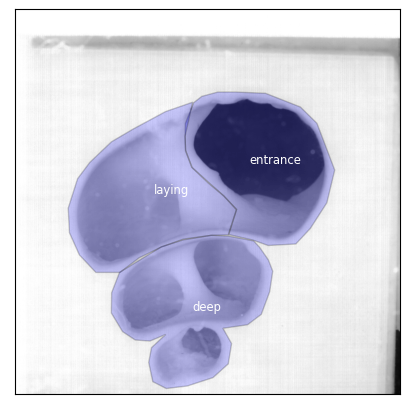

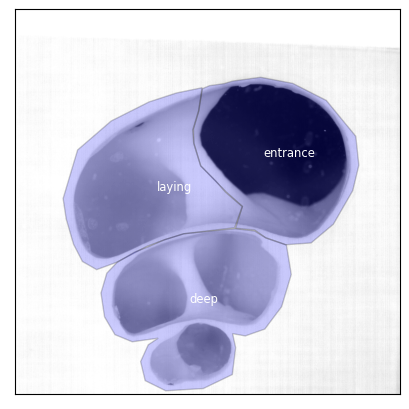

In [71]:
plot_chambers(ROI_dict_cam2, backgd_img_cam2)
plot_chambers(ROI_dict_cam3, backgd_img_cam3)

In [72]:
# get the width and height of the frame
height, width = backgd_img_cam2.shape
# this is needed as our position coordinates are normalized between 0 and 1 while our ROI coordinates are not
height, width

(2048, 2048)

In [74]:
# apply the above function to the x and y coordinates in each row of our larvae dataframe
# df_cam2_before = add_ROI_col(df_cam2_before, width, height, ROI_dict_cam2)
df_cam2_after = add_ROI_col(df_cam2_after, width, height, ROI_dict_cam2)
df_cam3_before = add_ROI_col(df_cam3_before, width, height, ROI_dict_cam3)
df_cam3_after = add_ROI_col(df_cam3_after, width, height, ROI_dict_cam3)

p:\Anaysis\Inshell\code\dataframe_utils.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["ROI"] = dataframe.apply(lambda row: extract_ROI(row['xcenter_normalized'], row['ycenter_normalized'], width, height, ROI_coords), axis=1)


## Merge back the split tables

In [75]:
# check: this should be the clutch exchange interval. NB: these shouldn't have a temporal overlap
print(df_cam3_before["time_of_day"].max())
print(df_cam2_after["time_of_day"].min())

2022-09-01 13:54:24
2022-09-01 14:55:05


In [76]:
clutch_A = df_cam3_before.append(df_cam2_after)
clutch_B = df_cam2_before.append(df_cam3_after)

## Plotting

### Tallying larvae numbers

In [77]:
larvae_table_A = pd.pivot_table(clutch_A, values='frame', index=['time_of_day', 'dpf'],
                    columns=['ROI'], aggfunc="count", fill_value=0)
larvae_table_A.reset_index(inplace=True)
larvae_table_A = larvae_table_A.rename_axis(None, axis=1)
larvae_table_A.head()

,time_of_day,dpf,deep,entrance,laying,outside
0,2022-08-26 11:07:00,0,0,0,1,0
1,2022-08-26 11:14:00,0,1,0,0,0
2,2022-08-26 11:20:00,0,0,0,1,0
3,2022-08-26 11:34:02,0,0,0,1,0
4,2022-08-26 11:55:05,0,0,0,1,0


In [78]:
timestamp_now = dt.datetime.now().strftime("%Y%m%d_%H%M%S")
larvae_table_A.to_csv(f'../{run_name_cam2}/data/{run_name_cam2}_{model}_tallies_raw_{timestamp_now}.csv', index=False)

In [79]:
larvae_table_B = pd.pivot_table(clutch_B, values='frame', index=['time_of_day', 'dpf'],
                    columns=['ROI'], aggfunc="count", fill_value=0)
larvae_table_B.reset_index(inplace=True)
larvae_table_B = larvae_table_B.rename_axis(None, axis=1)
larvae_table_B.head()

,time_of_day,dpf,deep,entrance,laying,outside
0,2022-09-01 14:41:04,4,16,0,0,0
1,2022-09-01 14:48:05,4,20,0,0,0
2,2022-09-01 14:55:06,4,21,0,0,0
3,2022-09-01 15:02:07,4,21,0,0,0
4,2022-09-01 15:09:08,4,21,0,0,0


In [80]:
timestamp_now = dt.datetime.now().strftime("%Y%m%d_%H%M%S")
larvae_table_B.to_csv(f'../{run_name_cam3}/data/{run_name_cam3}_{model}_tallies_raw_{timestamp_now}.csv', index=False)

### Clutch_A numbers

In [ ]:
# TO LOAD IN TALLIES CSV
larvae_table_A = pd.read_csv(f'../{run_name_cam2}/data/202212_model6_tallies_raw_20230901_172055.csv')

In [82]:
chamber_names = ['entrance', 'laying', 'deep']
larvae_table_normalized_A = larvae_table_A.copy()
maximum_tally_A = larvae_table_normalized_A[chamber_names].max()
larvae_table_normalized_A[chamber_names] /= maximum_tally_A

In [83]:
larvae_table_A['total']= larvae_table_A['deep'] + larvae_table_A['laying'] + larvae_table_A['entrance']

In [84]:
max_larvae_A=larvae_table_A['total'].max()

In [85]:
maximum_tally_A['total']=max_larvae_A
chambers= maximum_tally_A.index

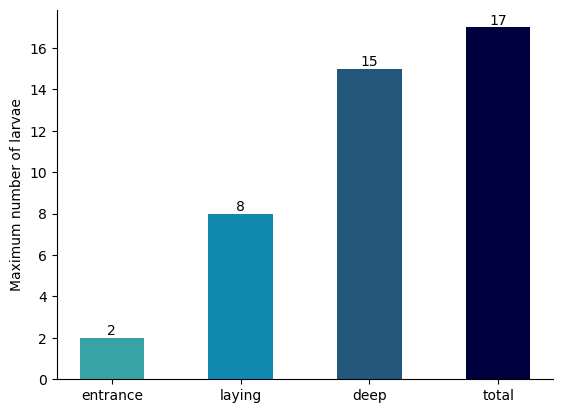

In [199]:
# plot Max for each chamber for suppliments 
c = [plotting_utils.ENTRANCE_COLOR, plotting_utils.LAYING_COLOR, plotting_utils.DEEP_COLOR, '#00003f']

fig, ax = plt.subplots()
ax.bar(chambers, maximum_tally_A, 0.5, color=c)

# Add the values on top of each bar
for i, value in enumerate(maximum_tally_A):
    ax.text(i, value, str(value), ha='center', va='bottom')

# Label your axes (optional)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Maximum number of larvae')

# Show the plot
plt.show()

In [200]:
# get current timestamp, which is used as part of the saved figure's file name (to avoid overwriting the same file)
# change cam based on where this clutch ends up
figure_path = f'../{run_name_cam2}/plots/{run_name_cam2}_{model}_clutchA_counts.pdf'

# save figure (either as png or pdf)
fig.savefig(figure_path, bbox_inches='tight')
print('Figure saved to:', os.path.abspath(figure_path))

Figure saved to: /zstorage/hera/inShell/Analysis/202301_cam2/plots/202301_cam2_model6_clutchA_counts.pdf


In [86]:
emergence_A = larvae_table_A[(larvae_table_A['dpf'] > 4) & (larvae_table_A['entrance'] >= 2)].head(1)
enter_laying_A = larvae_table_A[(larvae_table_A['dpf'] > 4) & (larvae_table_A['laying'] >= 2)].head(1)
enter_deep_A = larvae_table_A[(larvae_table_A['dpf'] > 1) & (larvae_table_A['laying'] <= 0)].head(1)

In [87]:
print(emergence_A)
print(enter_laying_A)
print(enter_deep_A)

             time_of_day  dpf  deep  entrance  laying  outside  total
1976 2022-09-05 08:55:06   10    17         2       6        0     25
             time_of_day  dpf  deep  entrance  laying  outside  total
1626 2022-09-03 15:09:08    8    14         0       4        0     18
            time_of_day  dpf  deep  entrance  laying  outside  total
586 2022-08-29 10:05:16    3     1         0       0        0      1


In [188]:
emergence_line_A = emergence_A["time_of_day"].values[0]
emergence_line_A

numpy.datetime64('2023-01-23T07:19:37.000000000')

### Clutch_B numbers

In [ ]:
# TO LOAD IN TALLIES CSV
larvae_table_B = pd.read_csv(f'../{run_name_cam3}/data/202212_model6_tallies_raw_20230901_172055.csv')

In [89]:
chamber_names = ['entrance', 'laying', 'deep']
larvae_table_normalized_B = larvae_table_B.copy()
maximum_tally_B = larvae_table_normalized_B[chamber_names].max()
larvae_table_normalized_B[chamber_names] /= maximum_tally_B

In [90]:
larvae_table_B['total']= larvae_table_B['deep'] + larvae_table_B['laying'] + larvae_table_B['entrance']

In [91]:
max_larvae_B=larvae_table_B['total'].max()

In [92]:
maximum_tally_B['total']=max_larvae_B
chambers= maximum_tally_B.index

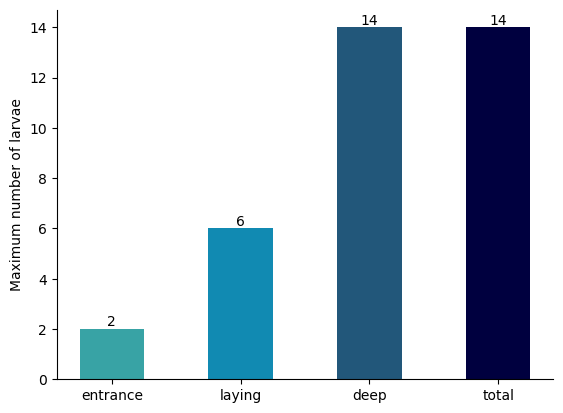

In [206]:
# plot Max for each chamber for suppliments 
c = [plotting_utils.ENTRANCE_COLOR, plotting_utils.LAYING_COLOR, plotting_utils.DEEP_COLOR, '#00003f']

fig, ax = plt.subplots()
ax.bar(chambers, maximum_tally_B, 0.5, color=c)

# Add the values on top of each bar
for i, value in enumerate(maximum_tally_B):
    ax.text(i, value, str(value), ha='center', va='bottom')

# Label your axes (optional)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylabel('Maximum number of larvae')

# Show the plot
plt.show()

In [207]:
# get current timestamp, which is used as part of the saved figure's file name (to avoid overwriting the same file)
# change cam based on where this clutch ends up
figure_path = f'../{run_name_cam3}/plots/{run_name_cam3}_{model}_clutchB_counts.pdf'

# save figure (either as png or pdf)
fig.savefig(figure_path, bbox_inches='tight')
print('Figure saved to:', os.path.abspath(figure_path))

Figure saved to: /zstorage/hera/inShell/Analysis/202301_cam3/plots/202301_cam3_model6_clutchB_counts.pdf


In [93]:
emergence_B = larvae_table_B[(larvae_table_B['dpf'] > 4) & (larvae_table_B['entrance'] >= 2)].head(1)
enter_laying_B = larvae_table_B[(larvae_table_B['dpf'] > 4) & (larvae_table_B['laying'] >= 2)].head(1)
enter_deep_B = larvae_table_B[(larvae_table_B['dpf'] > 1) & (larvae_table_B['laying'] <= 0)].head(1)

In [94]:
print(emergence_B)
print(enter_laying_B)
print(enter_deep_B)

            time_of_day  dpf  deep  entrance  laying  outside  total
966 2022-09-06 09:58:15    9     8         2      11        0     21
            time_of_day  dpf  deep  entrance  laying  outside  total
623 2022-09-04 17:07:00    7    19         0       2        0     21
          time_of_day  dpf  deep  entrance  laying  outside  total
0 2022-09-01 14:41:04    4    16         0       0        0     16


In [196]:
emergence_line_B = emergence_B["time_of_day"].values[0]
emergence_line_B

numpy.datetime64('2023-01-26T07:33:38.000000000')

### Overlay ROI on frames to check effect of camera movement

### Vertical Line Plot clutch A

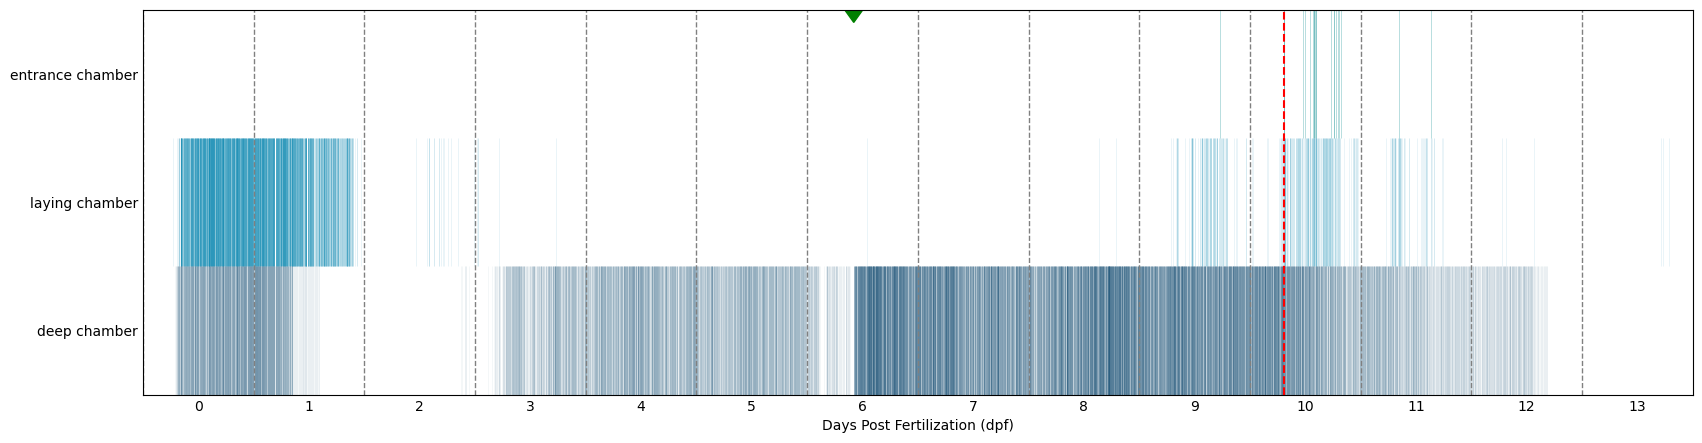

In [208]:
fig_vertical_line_plot_A = plot_vertical_line_plot(larvae_table_normalized_A, clutch_A)
#ax = fig_vertical_line_plot_A.axes[0]
#line_pos = dt.datetime.strptime(time_of_split_str, "%Y%m%d_%H%M%S")
#ax.axvline(line_pos, color='black', linestyle="-", linewidth=2)

# clutch swap: 20230119_100616
plt.arrow(dt.datetime(year=2023, month=1, day=19, hour=10, minute=6, second=16),3.5, 0, -0.6, color='green',length_includes_head=True, head_width=0.5, head_length=0.3)

#emergence
plt.axvline(x=emergence_line_A, color='red', linestyle='--')

plt.show()

In [209]:
# change cam based on where this clutch ends up
timestamp_now = dt.datetime.now().strftime("%Y%m%d_%H%M%S")
figure_path = f'../{run_name_cam2}/plots/{run_name_cam2}_{model}_chmaberplot_A_{timestamp_now}.pdf'
save_figure(fig_vertical_line_plot_A, figure_path)

Figure saved to: /zstorage/hera/inShell/Analysis/202301_cam2/plots/202301_cam2_model6_chmaberplot_A_20230908_164658.pdf


### Vertical Line Plot clutch B

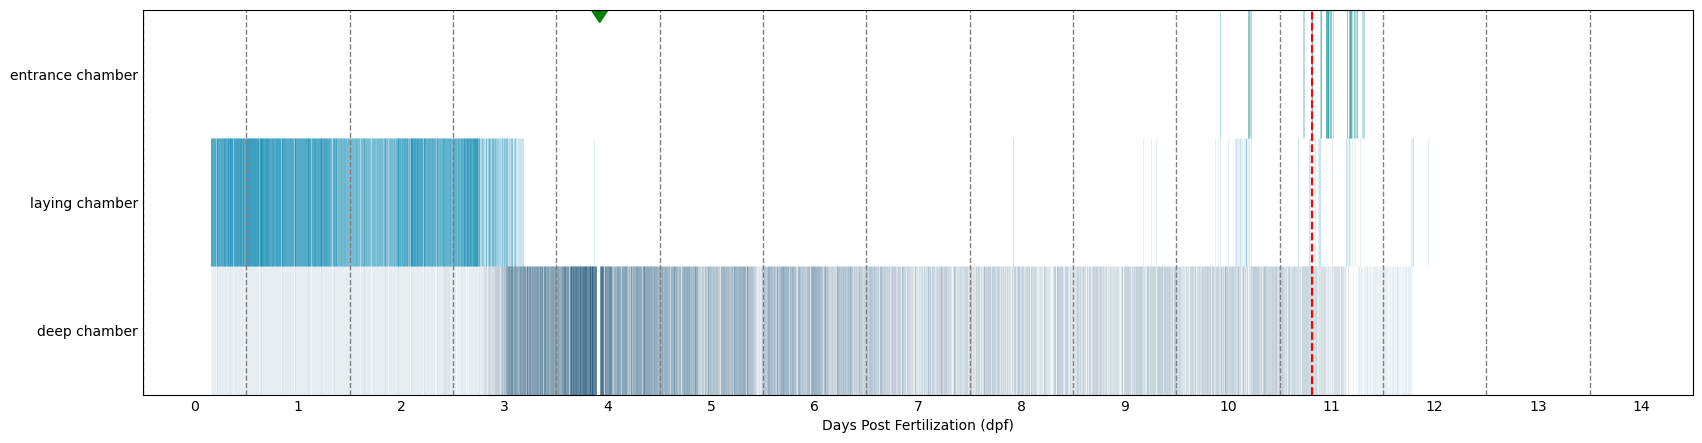

In [210]:
fig_vertical_line_plot_B = plot_vertical_line_plot(larvae_table_normalized_B, clutch_B, max_dpf=14)
#ax = fig_vertical_line_plot_B.axes[0]
#line_pos = dt.datetime.strptime(time_of_split_str, "%Y%m%d_%H%M%S")
#ax.axvline(line_pos, color='black', linestyle="-", linewidth=2)

# clutch swap: 20230119_100616
plt.arrow(dt.datetime(year=2023, month=1, day=19, hour=10, minute=6, second=16),3.5, 0, -0.6, color='green',length_includes_head=True, head_width=0.5, head_length=0.3)

#emergence
plt.axvline(x=emergence_line_B, color='red', linestyle='--')

plt.show()

In [211]:
#Change png to pdf if you want to save it in a different format
# change cam based on where this clutch ends up
timestamp_now = dt.datetime.now().strftime("%Y%m%d_%H%M%S")
figure_path = f'../{run_name_cam3}/plots/{run_name_cam3}_{model}_chamberplot_B_{timestamp_now}.pdf'
save_figure(fig_vertical_line_plot_B, figure_path)

Figure saved to: /zstorage/hera/inShell/Analysis/202301_cam3/plots/202301_cam3_model6_chamberplot_B_20230908_164708.pdf
